# Export dataset to CSV

In [1]:
import datetime

import numpy as np
import pandas as pd

export_path = "datasets/data_2020_2021.csv"

dataset_paths = [
    "datasets/new/Le Stephenson_data_from_1_1_2020_for_365_days.npy",
    "datasets/new/Le Stephenson_data_from_1_1_2021_for_279_days.npy"
]

columns = [
    "IBEAM_H",
    "IBEAM_N",
    "IDIFF_H",
    "GK",
    "RHUM",
    "IGLOB_H",
    "temperature_exterieure",
    "temperature_interieure",
    "taux_co2",
    "humidite",
    "cta_temperature",
    "electricite",
]

## Load dataset

In [2]:
def load_npy(path):
    ds = np.load(path, allow_pickle=True).item(0)
    return pd.DataFrame({**ds['OZE_data'], **ds['meteo_data']})

df = pd.concat(
    objs=[load_npy(path) for path in dataset_paths],
    ignore_index=True
)[columns]

## Add date information

In [3]:
start_date = datetime.datetime(year=2020, month=1, day=1)
df["date"] = df.index.map(lambda t: (start_date + datetime.timedelta(hours=t)).timestamp())

## Export to CSV

In [4]:
df.to_csv(export_path, index=False)

## Check CSV

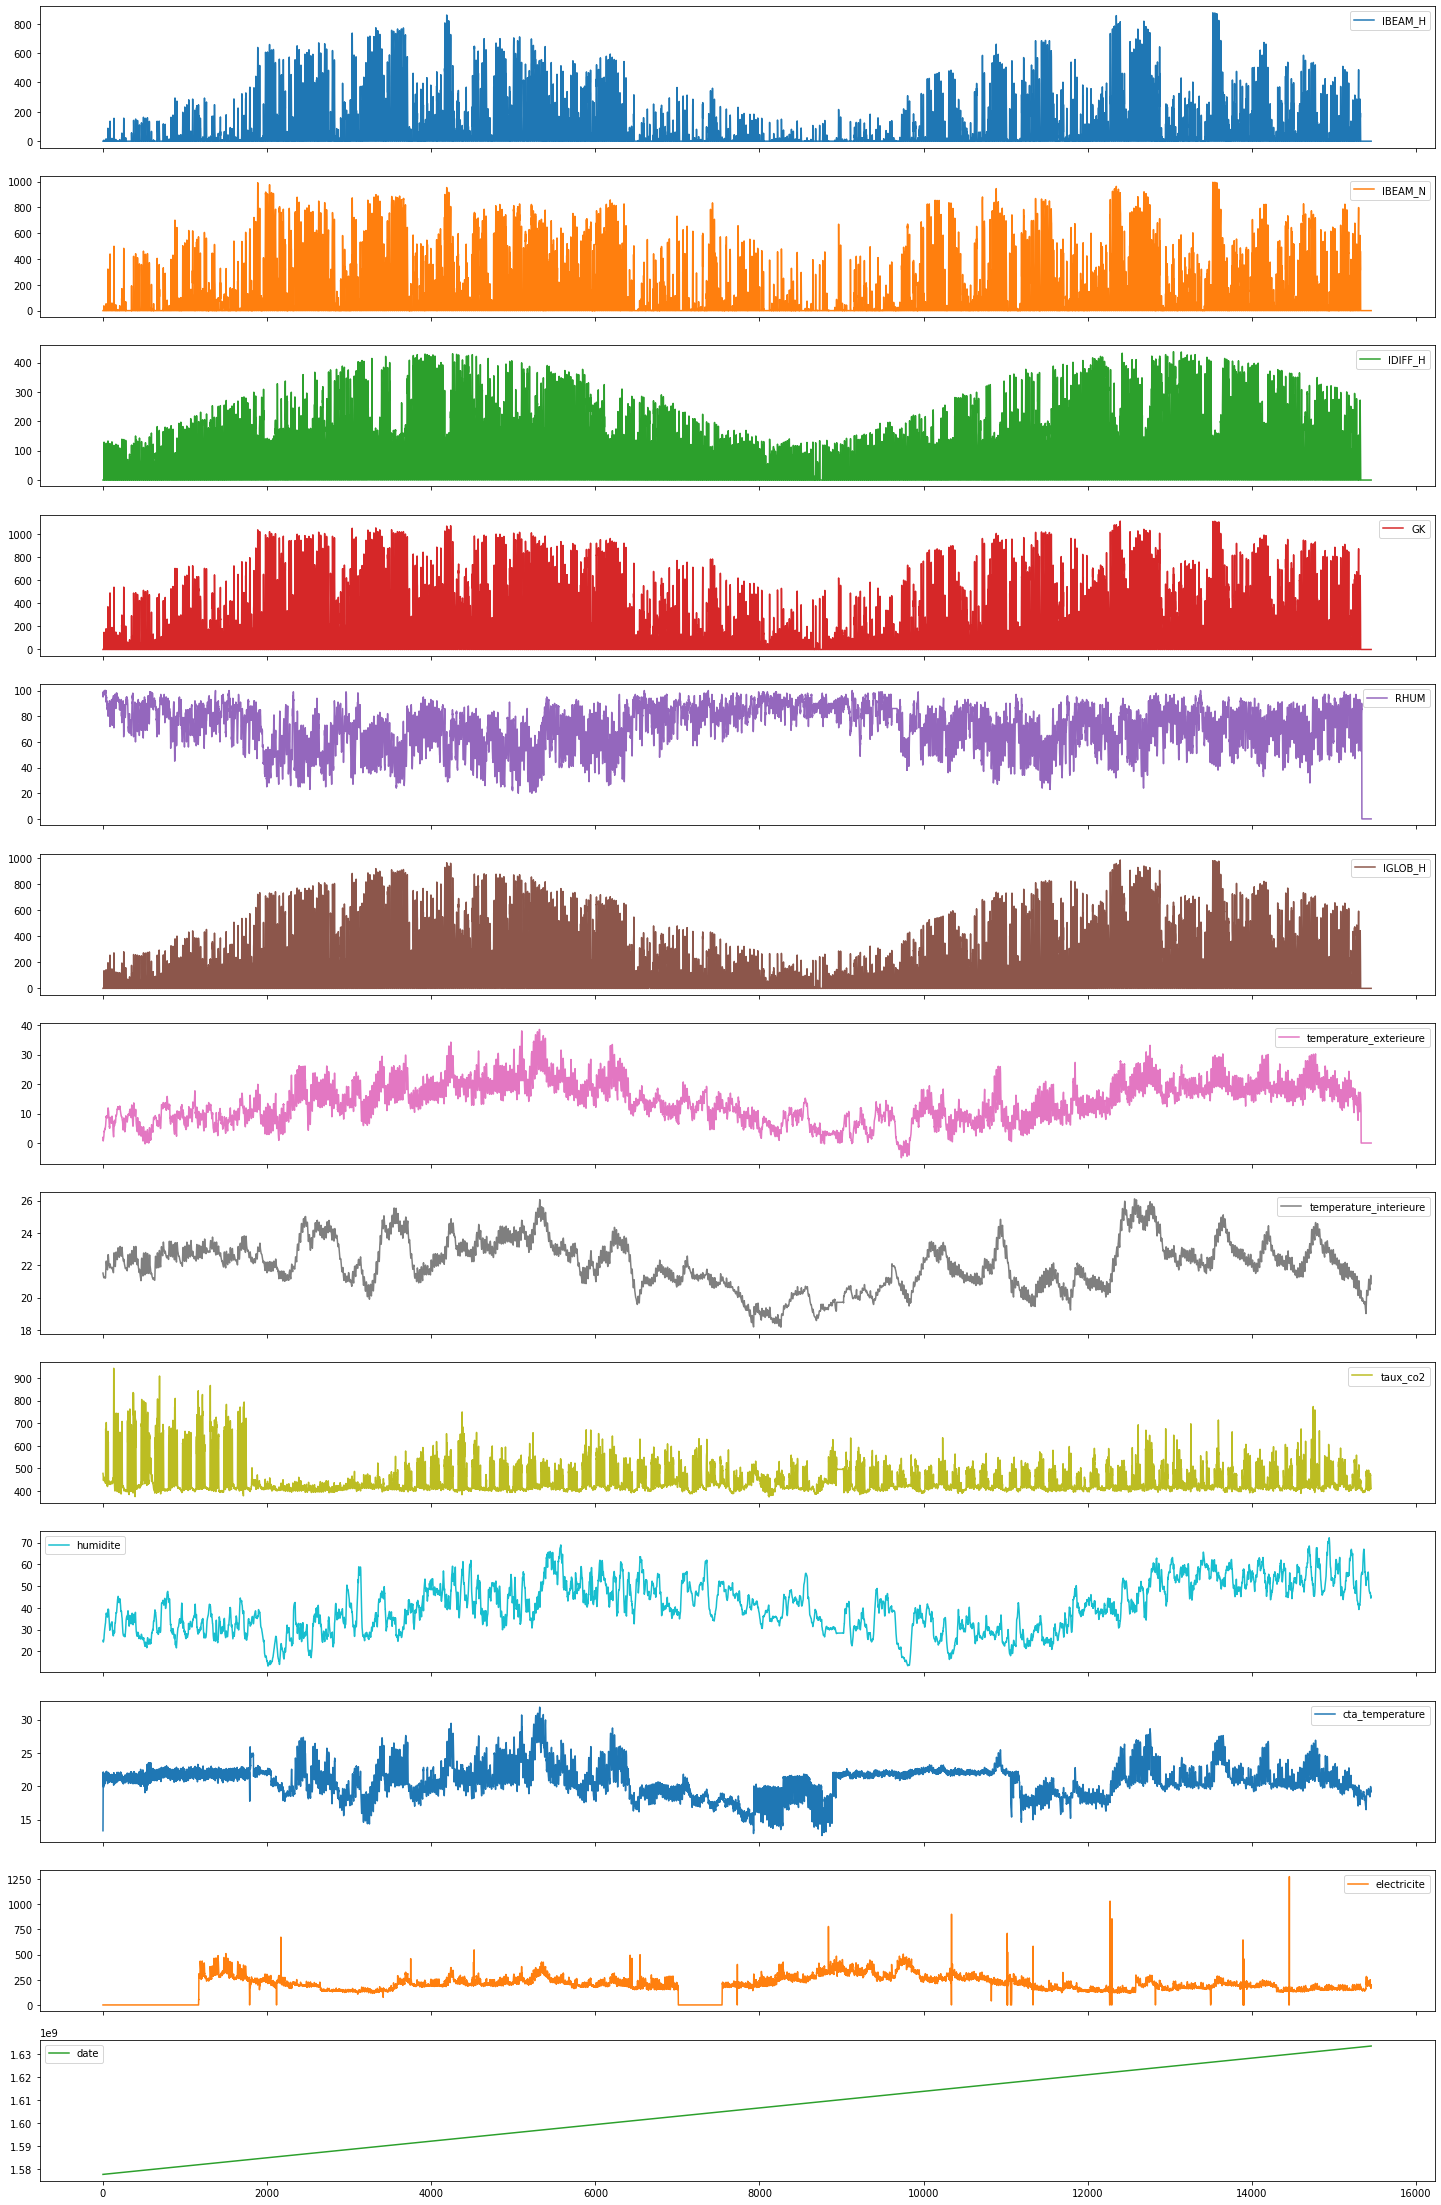

In [5]:
_ = pd.read_csv(export_path).plot(subplots=True, figsize=(25, 40))